In [1]:
'''
Dataset Description
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

File and Data Field Descriptions
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
sample_submission.csv - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.
original: https://www.kaggle.com/competitions/spaceship-titanic/data
'''

"\nDataset Description\nIn this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.\n\nFile and Data Field Descriptions\ntrain.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.\nPassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.\nHomePlanet - The planet the passenger departed from, typically their planet of permanent residence.\nCryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.\nCabin - The cabin number 

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import phik
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from warnings import simplefilter
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
simplefilter(action='ignore', category=FutureWarning)

# Dataframe research

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
# It'll be to complicated to restore data for cabin and consequences for feature engineering can be significant
df = df.dropna(subset = ['Cabin'],axis = 0)

In [8]:
# from data description, we khow about deck/num/side
df[['Deck','Num','Side']] = df.Cabin.str.split('/',expand = True)

C:\Users\medwe\AppData\Local\Temp\ipykernel_16092\3819000146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Deck','Num','Side']] = df.Cabin.str.split('/',expand = True)
C:\Users\medwe\AppData\Local\Temp\ipykernel_16092\3819000146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Deck','Num','Side']] = df.Cabin.str.split('/',expand = True)
C:\Users\medwe\AppData\Local\Temp\ipykernel_16092\3819000146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [9]:
df[['Deck','Num','Side']].nunique()

Deck       8
Num     1817
Side       2
dtype: int64

<AxesSubplot:>

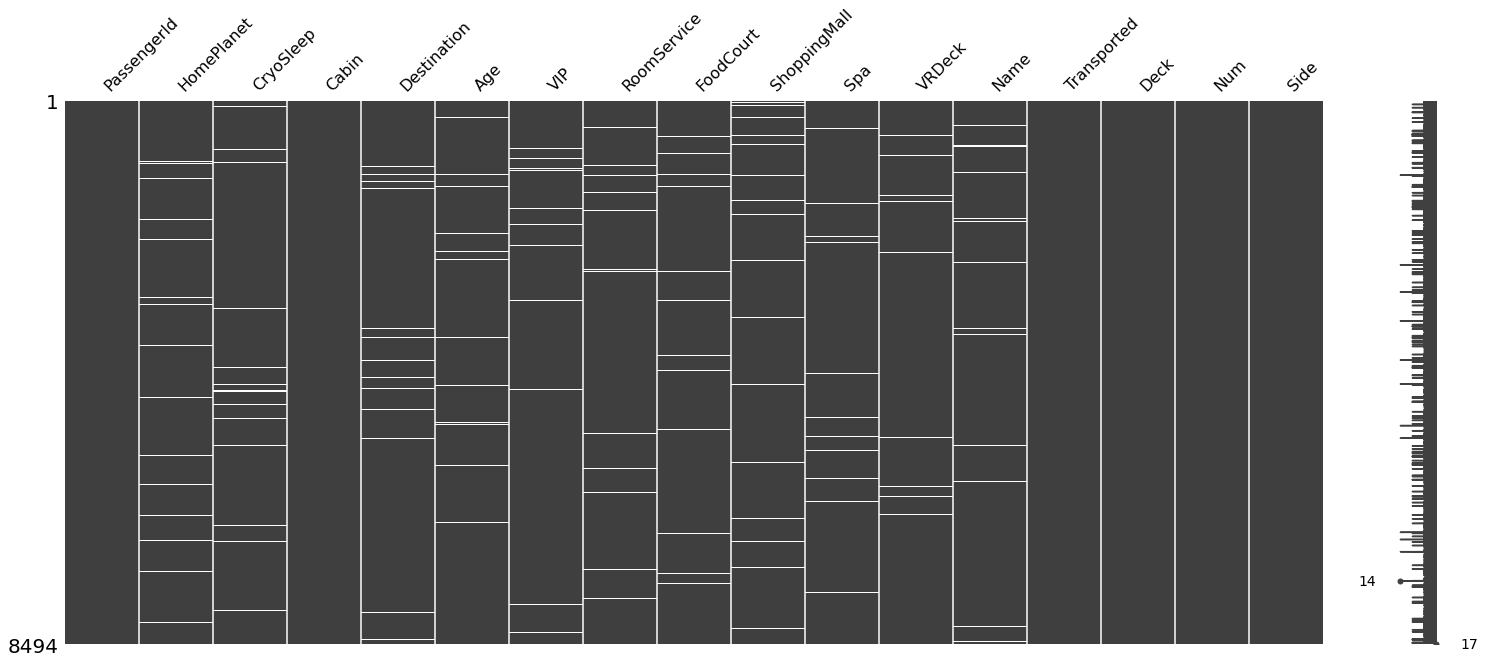

In [10]:
# the distribution of missing values looks random
msno.matrix(df)

In [11]:
# im my opinion, num withot deck and side means nothing. Also, name don't play significant role
df = df.drop(['Name','Num'], axis = 1)

<AxesSubplot:>

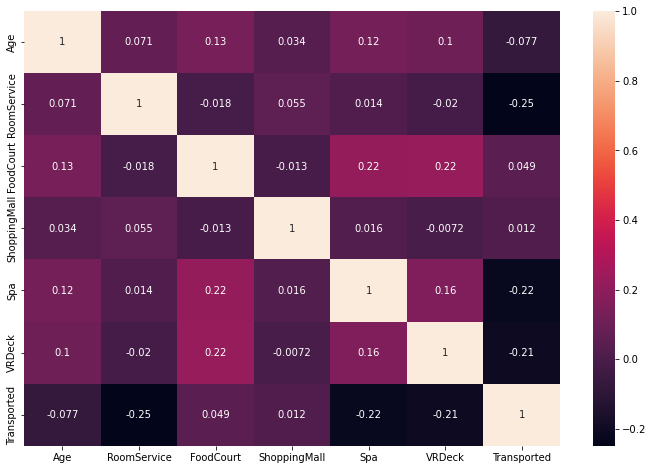

In [12]:
# let's see correlation in two ways
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True)

interval columns not set, guessing: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


d:\anac\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Cabin is large: 6560. Are you sure this is not an interval variable? Analysis for pairs of variables including Cabin can be slow.
  warnings.warn(


<AxesSubplot:>

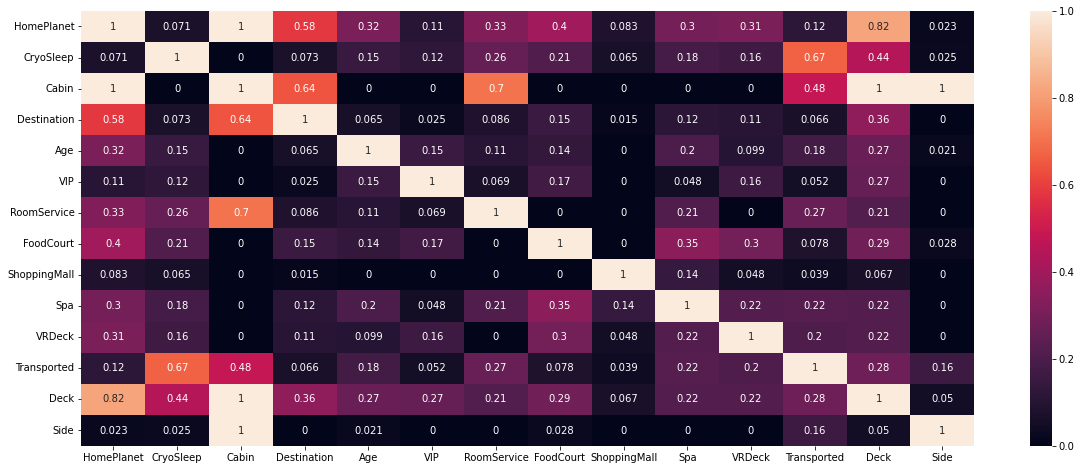

In [13]:
# The phik is suitable for calculating correlation in categorical variables and is sensitive to nonlinear dependencies
df_phik = df.drop(['PassengerId'], axis = 1)
plt.figure(figsize=(20,8))
corr1 = df_phik.phik_matrix()
sns.heatmap(corr1, annot=True)

correlation between wariables will be considered in the following paragraphs

# data filling mising values & transform

## HomePlanet missing values & transform

In [14]:
df['HomePlanet'].value_counts(dropna = False)

Earth     4507
Europa    2070
Mars      1722
NaN        195
Name: HomePlanet, dtype: int64

<AxesSubplot:>

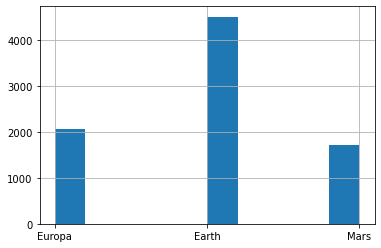

In [15]:
df['HomePlanet'].hist()

In [16]:
# 'HomePlanet' has correlation with 'Deck' and 'Destination'
pivot_table_HP_1 = pd.pivot_table(df, values='HomePlanet',columns = df['HomePlanet'], index='Deck',  aggfunc='count',fill_value=0)

In [17]:
pivot_table_HP_2 = pd.pivot_table(df, values='HomePlanet',columns = df['HomePlanet'], index='Destination',  aggfunc='count',fill_value=0)

In [18]:
from IPython.display import display
display(pivot_table_HP_1, pivot_table_HP_2)

HomePlanet,Earth,Europa,Mars
Deck,,,
A,0,252,0
B,0,766,0
C,0,734,0
D,0,186,282
E,395,128,330
F,1614,0,1110
G,2498,0,0
T,0,4,0


HomePlanet,Earth,Europa,Mars
Destination,,,
55 Cancri e,676,854,191
PSO J318.5-22,696,18,48
TRAPPIST-1e,3038,1161,1443


In [19]:
# We can see, Deck G only for Earth
# And most destination 'PSO J318.5-22' match with Earth
# Deck A, B, C for Europa
df.loc[(df.HomePlanet.isna() & df.Deck.eq('G')), 'HomePlanet'] = 'Earth'
df.loc[(df.HomePlanet.isna() & df.Destination.eq('PSO J318.5-22')), 'HomePlanet'] = 'Earth'
df.loc[(df.HomePlanet.isna() & df.Deck.isin(['A', 'B', 'C'])), 'HomePlanet'] = 'Europa'

In [20]:
df['HomePlanet'].isna().sum()

98

In [21]:
# completed half missing values, other we'll delete
df = df.dropna(subset = ['HomePlanet'],axis = 0)

In [22]:
df['HomePlanet'].value_counts(dropna = False)

Earth     4574
Europa    2100
Mars      1722
Name: HomePlanet, dtype: int64

<AxesSubplot:>

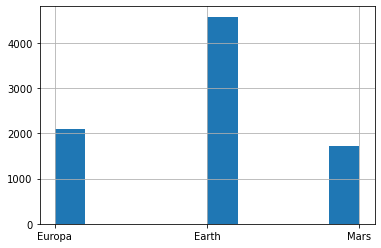

In [23]:
# the distribution is the same as before
df['HomePlanet'].hist()

## CryoSleep missing values & transform

In [24]:
df['CryoSleep'].value_counts(dropna = False)

False    5259
True     2928
NaN       209
Name: CryoSleep, dtype: int64

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

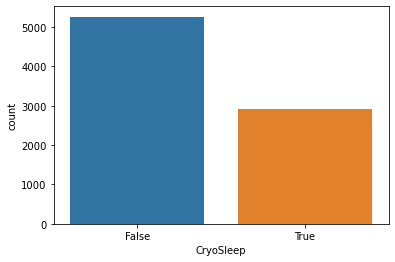

In [25]:
sns.countplot(data = df, x = df['CryoSleep'])

In [26]:
# 'CryoSleep' has correlation with 'Deck'
pivot_table_CS_1 = pd.pivot_table(df, values='Deck',columns = df['Deck'], index='CryoSleep',  aggfunc='count',fill_value=0)

In [27]:
pivot_table_CS_1

Deck,A,B,C,D,E,F,G,T
CryoSleep,,,,,,,,
False,182,341,430,359,671,2127,1146,3
True,68,419,294,101,163,533,1350,0


In [28]:
# fill in the most common value on the deck
df['CryoSleep'] = df.groupby('Deck')['CryoSleep'].apply(lambda x: x.fillna(x.mode()[0]) if not x.isnull().all() else x)

In [29]:
df['CryoSleep'].value_counts(dropna = False)

False    5386
True     3010
Name: CryoSleep, dtype: int64

In [30]:
df['CryoSleep'] = df['CryoSleep']*1

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

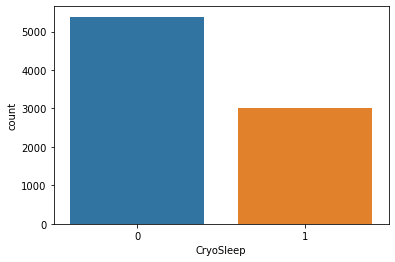

In [31]:
# the distribution has not changed
sns.countplot(data = df, x = df['CryoSleep'])

## Destination missing values & transform

In [32]:
df['Destination'].value_counts(dropna = False)

TRAPPIST-1e      5703
55 Cancri e      1738
PSO J318.5-22     778
NaN               177
Name: Destination, dtype: int64

<AxesSubplot:>

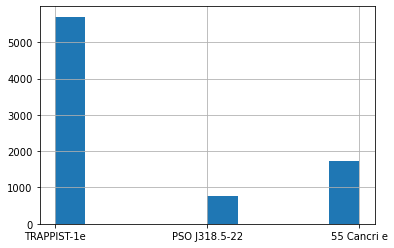

In [33]:
df['Destination'].hist()

In [34]:
# 'Destination' has correlation with 'Deck' and 'HomePlanet'
pivot_table_destination_1 = pd.pivot_table(df, values='Deck',columns = df['Deck'], index='Destination',  aggfunc='count',fill_value=0)

In [35]:
pivot_table_destination_2 = pd.pivot_table(df, values='HomePlanet',columns = df['HomePlanet'], index='Destination',  aggfunc='count',fill_value=0)

In [36]:
display(pivot_table_destination_1, pivot_table_destination_2)

Deck,A,B,C,D,E,F,G,T
Destination,,,,,,,,
55 Cancri e,108,333,317,109,112,394,365,0
PSO J318.5-22,2,3,13,17,41,241,461,0
TRAPPIST-1e,142,426,405,333,678,2027,1688,4


HomePlanet,Earth,Europa,Mars
Destination,,,
55 Cancri e,682,865,191
PSO J318.5-22,712,18,48
TRAPPIST-1e,3080,1180,1443


In [37]:
# fill in the most common value in group
df['Destination'] = df.groupby(['Deck', 'HomePlanet'])['Destination'].apply(lambda x: x.fillna(x.mode()[0]) if not x.isnull().all() else x)

In [38]:
# it fills like most common - TRAPPIST-1e
df['Destination'].value_counts(dropna = False)

TRAPPIST-1e      5880
55 Cancri e      1738
PSO J318.5-22     778
Name: Destination, dtype: int64

<AxesSubplot:>

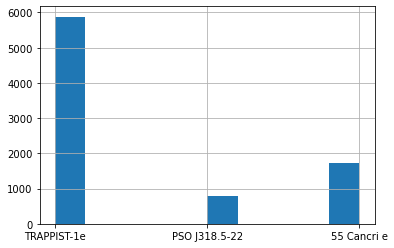

In [39]:
# the same distribution
df['Destination'].hist()

## Age missing values & transform

In [40]:
df.Age.isna().sum()

175

<AxesSubplot:>

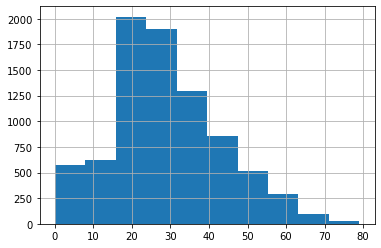

In [41]:
# most people from 20 to 30. And age has correlation with Home planet
df['Age'].hist()

In [42]:
# we'll impute with median on the planet
median_age = df.groupby('HomePlanet')['Age'].median()

In [43]:
df['Age'] = df.apply(lambda x: median_age[x['HomePlanet']] if pd.isna(x['Age']) else x['Age'], axis=1)

In [44]:
df.Age.isna().sum()

0

<AxesSubplot:>

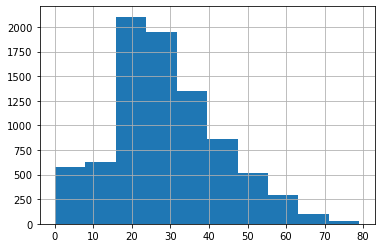

In [45]:
# the distribution has not changed
df['Age'].hist()

## VIP missing values & transform

In [46]:
df['VIP'].value_counts(dropna = False)

False    8012
NaN       196
True      188
Name: VIP, dtype: int64

<AxesSubplot:xlabel='VIP', ylabel='count'>

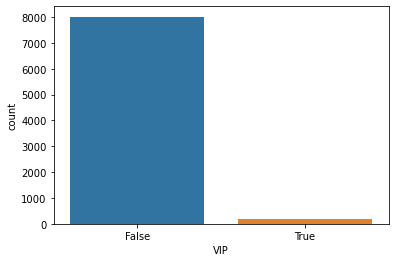

In [47]:
sns.countplot(data = df, x = df['VIP'])

In [48]:
# most passengers not VIP
df['VIP'] = df['VIP'].fillna(False)

In [49]:
df['VIP'].value_counts(dropna = False)

False    8208
True      188
Name: VIP, dtype: int64

In [50]:
df['VIP'] = df['VIP']*1

<AxesSubplot:xlabel='VIP', ylabel='count'>

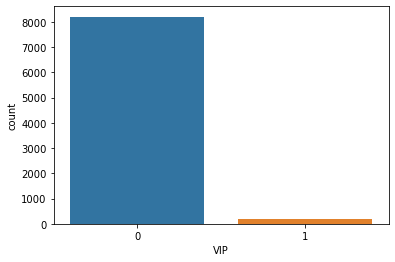

In [51]:
sns.countplot(data = df, x = df['VIP'])

## RoomService missing values & transform

In [52]:
df['RoomService'].describe()

count    8224.000000
mean      220.464859
std       641.591179
min         0.000000
25%         0.000000
50%         0.000000
75%        45.000000
max      9920.000000
Name: RoomService, dtype: float64

<AxesSubplot:>

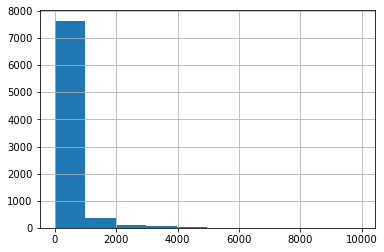

In [53]:
df['RoomService'].hist()

In [54]:
df['RoomService'].isna().sum()

172

In [55]:
# Room service has strong correlation with cabin. Let's try impute by median 
median_RoomService = df.groupby('Cabin')['RoomService'].median()

In [56]:
df['RoomService'] = df.apply(lambda x: median_RoomService[x['Cabin']] if pd.isna(x['RoomService']) else x['RoomService'], axis=1)

In [57]:
# almost 60 values were filled in
df['RoomService'].isna().sum()

118

In [58]:
# let's remove others
df = df.dropna(subset = ['RoomService'],axis = 0)

In [59]:
df['RoomService'].isna().sum()

0

<AxesSubplot:>

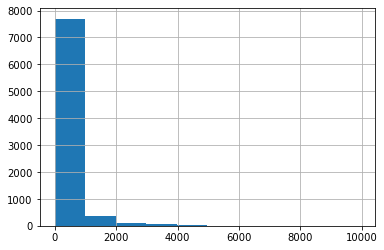

In [60]:
# the same distribution
df['RoomService'].hist()

## FoodCourt,ShoppingMall, Spa,VRDeck missing values & transform

FoodCourt,ShoppingMall, Spa,VRDeck have weak correlation with other data. Let's fill with knn method

In [61]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt       177
ShoppingMall    200
Spa             180
VRDeck          182
Transported       0
Deck              0
Side              0
dtype: int64

<AxesSubplot:>

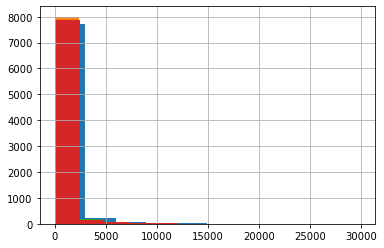

In [62]:
df['FoodCourt'].hist()
df['ShoppingMall'].hist()
df['Spa'].hist()
df['VRDeck'].hist()

In [63]:
num_cols = ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imputer_knn = KNNImputer(n_neighbors=5)
df[num_cols] = imputer_knn.fit_transform(df[num_cols])

In [64]:
# we have managed the missing values
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

# Preparing for modeling

For modeling let's use Cat Boost. It can managed with categorial variables, so we don't use ONE or OE

In [65]:
df['Transported'] = df['Transported']*1

In [66]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,P
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,S
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,S
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,P
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,G,S
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,G,S
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,S


In [67]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Deck', 'Side'],
      dtype='object')

In [68]:
df.select_dtypes(object).columns

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Deck', 'Side'], dtype='object')

In [69]:
X = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 
     'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 
     'Spa', 'VRDeck','Deck', 'Side']
cat_features = ['HomePlanet', 'Cabin', 'Destination', 'Deck', 'Side']
y = ['Transported']

# Test dataframe

In [70]:
df_test = pd.read_csv('test.csv')

In [71]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [72]:
# it's enough missing values, but in test dataframe we can't just drop them
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [73]:
# same steps as for training dataframe
df_test[['Deck','Num','Side']] = df_test.Cabin.str.split('/',expand = True)

In [74]:
df_test = df_test.drop(['Name','Num'], axis = 1)

In [75]:
df_test['CryoSleep'] = df_test['CryoSleep']*1

In [76]:
df_test['VIP'] = df_test['VIP']*1

In [77]:
# for filling, I sure only for home planet. As for the rest, catboost able to make predict wit missing values
df_test.loc[(df_test.HomePlanet.isna() & df_test.Deck.eq('G')), 'HomePlanet'] = 'Earth'
df_test.loc[(df_test.HomePlanet.isna() & df_test.Destination.eq('PSO J318.5-22')), 'HomePlanet'] = 'Earth'
df_test.loc[(df_test.HomePlanet.isna() & df_test.Deck.isin(['A', 'B', 'C'])), 'HomePlanet'] = 'Europa'

In [78]:
# fill NaN like string for catboost
df_test[cat_features] = df_test[cat_features].fillna('NaN')

# Modeling and predict

In [79]:
train, val = train_test_split(df, train_size = 0.8, random_state = 42)

In [80]:
from catboost import Pool

train_data = Pool(data = train[X],
                  label = train[y],
                  cat_features = cat_features
                 )

val_data = Pool(data = val[X],
                label = val[y],
                cat_features = cat_features
                 )

In [81]:
parameters = {'iterations': 1000,
              'cat_features': cat_features,
              'verbose': False,
              'random_seed': 42}

In [82]:
model = CatBoostClassifier(**parameters)

In [83]:
param_grid = {
    'eval_metric': ['Accuracy', 'Logloss', 'CrossEntropy','F', 'F1', 'PRAUC']
    }

In [84]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv = 5, n_jobs = -1)
grid_search.fit(train[X], train[y], eval_set=(val[X], val[y]), cat_features=cat_features)

d:\anac\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anac\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anac\lib\site-packages\catboost\core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "d:\anac\lib\site-packages\catboost\core.py", line 2355, in _fit
    self._train(
  File "d:\anac\lib\site-packages\catboost\cor

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002604C29EFD0>,
             n_jobs=-1,
             param_grid={'eval_metric': ['Accuracy', 'Logloss', 'CrossEntropy',
                                         'F', 'F1', 'PRAUC']})

In [85]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'eval_metric': 'Accuracy'}
Best Score:  0.8113860799179161


In [87]:
parameters = {'iterations': 1000,
              'cat_features': cat_features,
              'eval_metric': 'Accuracy',
              'verbose': False,
              'random_seed': 42,
}

In [88]:
model.fit(train_data, eval_set = val_data)

In [89]:
model.predict(df_test[X])

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [90]:
df_test['prediction'] = model.predict(df_test[X])

In [91]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId,
                       'Transported': df_test.prediction.astype(bool)})
output.to_csv('submission_001.csv', index=False)